# Traversal Visits

measured as the accumulated number of visits after traversing the network:
 1. begin at every article
 2. first link receives +1 visit
 3. continue to next first link, +1 visit 
     - stop at a repeated article or invalid link

In [2]:
import pandas as pd
from scipy import stats 
import numpy as np
import json

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

path = "/Users/mark/Dropbox/Math/Complex_Systems/research/wikipedia-network/paper/writeup/graphics/"

In [3]:
#load results into dataframe (~ 1min runtime)

results_path = "/Users/mark/Desktop/wiki_v4/"
with open(results_path + "clicks.json") as f:
    dict = json.load(f)
df = pd.DataFrame(dict.items())
df.columns = ['article', 'traversal visits']

df = df.sort_values(by='traversal visits', ascending=False)

In [3]:
#add a rank column and log scaled columns

df['log(traversal visits)'] = np.log10(df['traversal visits']+1)
df['rank'] = np.arange(1, df.shape[0]+1)
df['log(rank)'] = np.log10(df['rank'])

df['traversal visits (m)'] = df['traversal visits'] / 1000000

## Top 50 Articles

In [6]:
df.head(50)

,article,traversal visits
1031718,Existence,7400884
3381363,Quality (philosophy),7400884
4495967,Consciousness,7400884
1020904,Conscious,7400884
973077,Awareness,7400884
7948850,Philosophy,7400884
7974918,Reality,7400884
4042014,Modern philosophy,7269259
1584377,Property (philosophy),7269255
7062295,Quantity,7259791


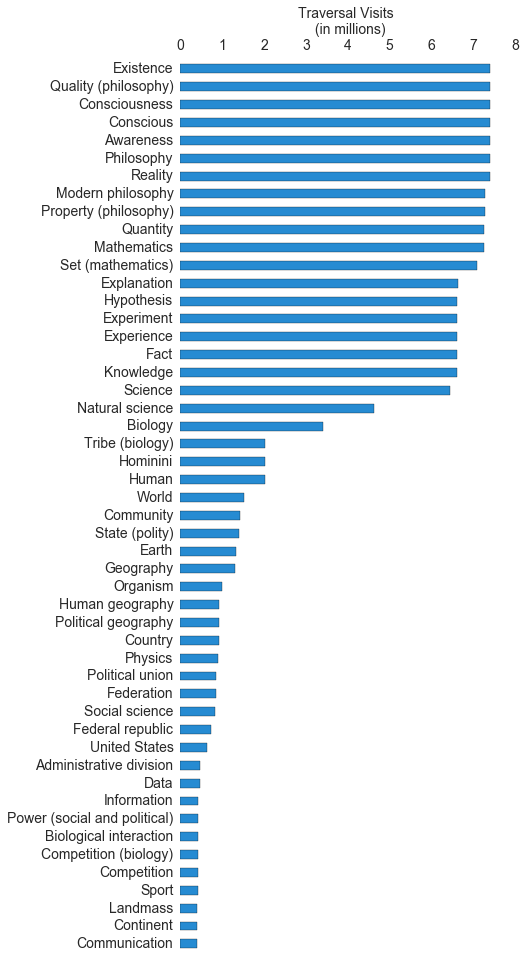

In [25]:
df.head(50).iloc[::-1].plot(x="article", y="traversal visits (m)", kind="barh", fontsize=14,
                            legend=False, figsize=(6,16), color="#268bd2")
#no background
ax = plt.gca()
ax.patch.set_visible(False) 


plt.xlabel("Traversal Visits \n (in millions)", fontsize=14)
plt.ylabel("")
ax.xaxis.tick_top()
ax.xaxis.set_label_position('top')

plt.tick_params(axis='x', which='major', labelsize=14)

#save figure
plt.savefig(path+'articles_ranked.png', format='png', dpi=300, bbox_inches='tight')

## How many articles are there?

In [7]:
df.count()

article             11277534
traversal visits    11277534
dtype: int64

## How many articles have 0 traversal visits?

In [6]:
df[df['traversal visits'] == 0].count()

page      8567636
visits    8567636
dtype: int64

## How many articles have fewer than 100 traversal visits?

In [8]:
df[df['traversal visits'] < 100].count()

article             11251449
traversal visits    11251449
dtype: int64

## How many articles have more than 100 traversal visits?

In [8]:
df[df['traversal visits'] > 100].count()

page      25845
visits    25845
dtype: int64

## What's the distribution of traversal visits?

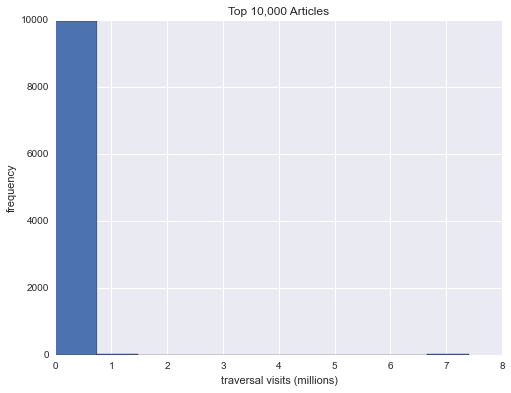

In [32]:
plt.figure(figsize=(8,6))
visits_plot1 = df['traversal visits (m)'].head(10000).plot(kind='hist', title="Top 10,000 Articles")
visits_plot1.set_xlabel("traversal visits (millions)")
visits_plot1.set_ylabel("frequency")

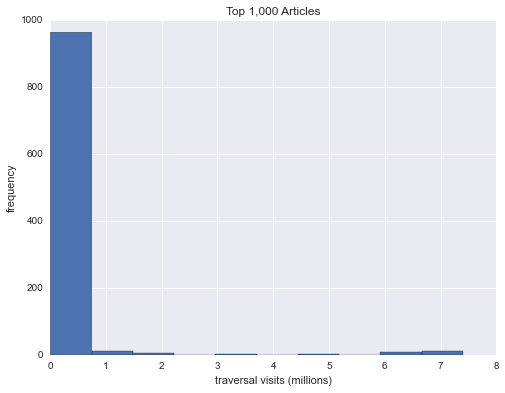

In [35]:
plt.figure(figsize=(8,6))
visits_plot2 = df['traversal visits (m)'].head(1000).plot(kind='hist', title="Top 1,000 Articles")
visits_plot2.set_xlabel("traversal visits (millions)")
visits_plot2.set_ylabel("frequency")

#save figure
plt.savefig(path+'top_1k_article_traversals.png', format='png', dpi=300, bbox_inches='tight')

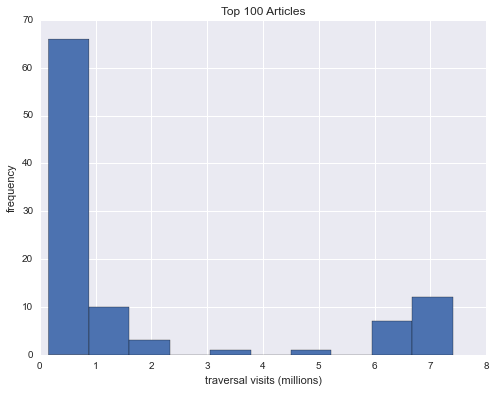

In [36]:
plt.figure(figsize=(8,6))
visits_plot3 = df['traversal visits (m)'].head(100).plot(kind='hist', title="Top 100 Articles")
visits_plot3.set_xlabel("traversal visits (millions)")
visits_plot3.set_ylabel("frequency")

#save figure
plt.savefig(path+'top_100_article_traversals.png', format='png', dpi=300, bbox_inches='tight')

### all articles

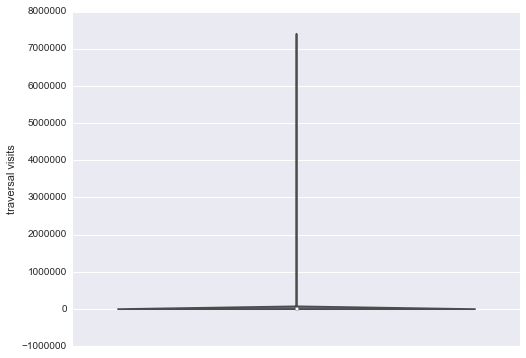

In [22]:
plt.figure(figsize=(8,6))
sns.violinplot(y='traversal visits', data=df)


/Users/mark/Envs/wiki-py2/lib/python2.7/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


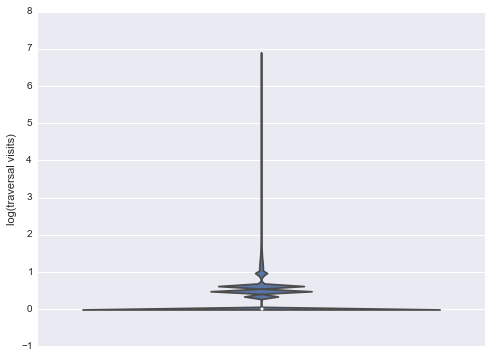

In [4]:
#log traversal visits
plt.figure(figsize=(8,6))

sns.violinplot(y='log(traversal visits)', data=df)


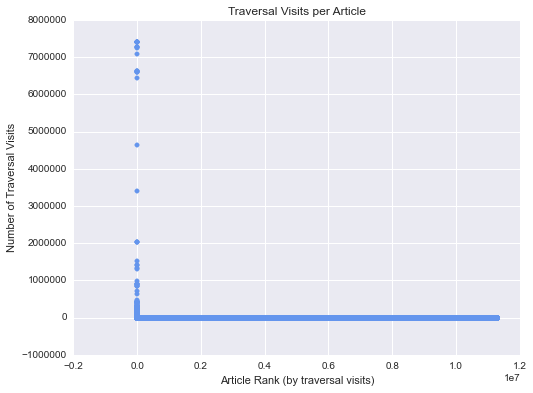

In [24]:
#traversal visists versus rank
plt.figure(figsize=(8,6))

plt.scatter(df["rank"], df["traversal visits"], color="#6495ED")
plt.title("Traversal Visits per Article")
plt.ylabel("Number of Traversal Visits")
plt.xlabel("Article Rank (by traversal visits)")


## On a Logarithmic Scale

In [5]:
#linear fit of log(rank) vs. log(traveral visits)
slope, intercept, r_value, p_value, std_err = stats.linregress(df["log(rank)"], df["log(traversal visits)"])
print slope, intercept, r_value, p_value, std_err 


-0.636060645731 4.34266050449 -0.930719619472 0.0 7.44281732628e-05


### Power-law exponent: -0.636

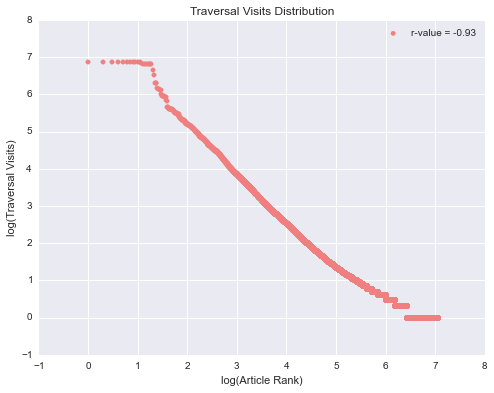

In [6]:
plt.figure(figsize=(8,6))

plt.scatter(df["log(rank)"], df["log(traversal visits)"],  color="#F08080", label="r-value = -0.93")

plt.title("Traversal Visits Distribution")
plt.xlabel("log(Article Rank)")
plt.ylabel("log(Traversal Visits)")
plt.legend()



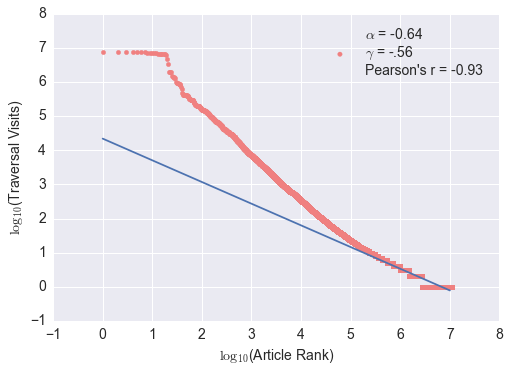

In [4]:
plt.scatter(df["log(rank)"], df["log(traversal visits)"], color="#F08080",
                        label=r'$\alpha$ = -0.64'+"\n$\gamma$ = -.56"+"\nPearson\'s r = -0.93 ")
plt.xlabel("$\log_{10}$(Article Rank)", fontsize=14)
plt.ylabel("$\log_{10}$(Traversal Visits)", fontsize=14)
plt.tick_params(axis='both', which='major', labelsize=14) #axis font size
plt.legend(fontsize=14)

plt.plot(range(0, 8), [x*-0.636060 + 4.34266050449 for x in range(0, 8)])


### Top Regime

In [10]:
slope, intercept, r_value, p_value, std_err = stats.linregress(df["log(rank)"][:10**5], df["log(traversal visits)"][:10**5])
print slope, intercept, r_value, p_value, std_err 

-1.22827104244 7.45682294098 -0.998440306922 0.0 0.000217190894288


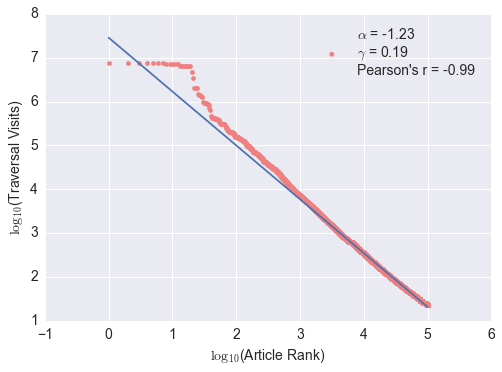

In [12]:
plt.scatter(df["log(rank)"][:10**5], df["log(traversal visits)"][:10**5:], color="#F08080")
plt.xlabel("$\log_{10}$(Article Rank)", fontsize=14)
plt.ylabel("$\log_{10}$(Traversal Visits)", fontsize=14)
plt.tick_params(axis='both', which='major', labelsize=14) #axis font size
plt.legend(fontsize=14)

plt.plot(range(0, 6), [x*-1.22827104244 + 7.45682294098 for x in range(0, 6)])

### Bottom Regime

In [13]:
slope, intercept, r_value, p_value, std_err = stats.linregress(df["log(rank)"][10**5:], 
                                                               df["log(traversal visits)"][10**5:])
print slope, intercept, r_value, p_value, std_err 

-0.57896217612 3.96006843729 -0.919092356404 0.0 7.42439023587e-05


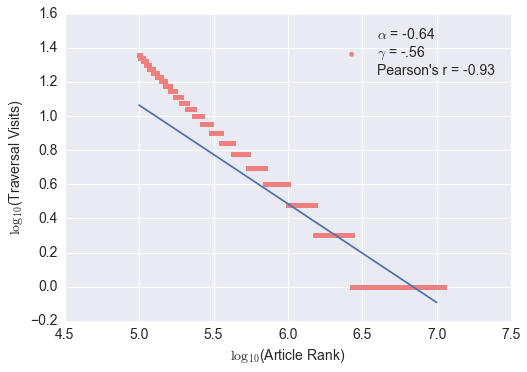

In [14]:
plt.scatter(df["log(rank)"][10**5:], df["log(traversal visits)"][10**5:], color="#F08080")
plt.xlabel("$\log_{10}$(Article Rank)", fontsize=14)
plt.ylabel("$\log_{10}$(Traversal Visits)", fontsize=14)
plt.tick_params(axis='both', which='major', labelsize=14) #axis font size
plt.legend(fontsize=14)

plt.plot(range(5, 8), [x*-0.57896217612 + 3.96006843729 for x in range(5, 8)])

## combined plot with regimes

In [ ]:
plt.scatter(df["log(rank)"], df["log(traversal visits)"], color="#F08080", 
            label=None)
plt.xlabel("$\log_{10}$(Article Rank)", fontsize=14)
plt.ylabel("$\log_{10}$(Traversal Visits)", fontsize=14)
plt.tick_params(axis='both', which='major', labelsize=14) #axis font size

#top regime
plt.plot(range(0, 6), [x*-1.22827104244 + 7.45682294098 for x in range(0, 6)], 
         label=r'$\alpha$ = -1.23'+"\n$\gamma$ = 0.187"+"\nPearson\'s r = -0.99")
plt.legend(fontsize=14)

#bottom regime
plt.plot(range(5, 8), [x*-0.57896217612 + 3.96006843729 for x in range(5, 8)],
        label="\n" + r'$\alpha$ = -0.579'+"\n$\gamma$ = -0.727"+"\nPearson\'s r = -0.93")
plt.legend(fontsize=14)

#define plot axis limits
axes = plt.gca()
xticks = axes.xaxis.get_major_ticks()
xticks[0].label1.set_visible(False)
yticks = axes.yaxis.get_major_ticks()
yticks[0].label1.set_visible(False)

#save figure
plt.savefig(path+'traversals_per_article.png', format='png', dpi=300, bbox_inches='tight')


### Fit to a Power Law
* For full analysis of Power Law Fit see "power_law_visits.ipynb"

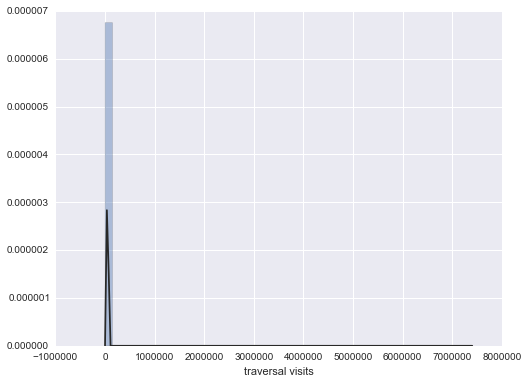

In [26]:
plt.figure(figsize=(8,6))

sns.distplot(df["traversal visits"], kde=False, fit=stats.powerlaw)

## Descriptive Statistics

In [15]:
df['traversal visits'].describe()

count    11277534.000000
mean           20.603523
std          9501.095584
min             0.000000
25%             0.000000
50%             0.000000
75%             0.000000
max       7400884.000000
Name: traversal visits, dtype: float64

## A sample of articles with 0 traversal vists 

In [16]:
df.sort(columns='traversal visits').head(50)


,article,traversal visits
5638766,Topspin 3,0
9645400,Marco Zwyssig,0
5840661,Bobby Webb,0
5840659,The Lord of the Nazgûl,0
5840658,"Mansuri, Bafq",0
5840657,Nyctemera fasciata,0
5840656,Kiss of Life (film),0
9645402,Darreh-ye Gachi Ab Deyfeh,0
5840654,Billy Lang,0
5840653,911 gt3,0
